In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
base_dir = os.listdir('M&F')

#yahya show the content of dataset

base_dir


['train', 'validation']

In [3]:
# show the content for each file in train and validation



base_dir = 'M&F'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['female', 'male']

Contents of validation directory:
['female', 'male']


In [4]:
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

train_male_dir = os.path.join(train_dir , 'male')
train_female_dir = os.path.join(train_dir , 'female')


val_male_dir = os.path.join(validation_dir , 'male')
val_female_dir = os.path.join(validation_dir , 'female')






In [5]:
train_male_fnames = os.listdir( train_male_dir )
train_female_fnames = os.listdir( train_female_dir )

print(train_male_fnames[:10])
print(train_female_fnames[:10])

['081256.jpg.jpg', '081261.jpg.jpg', '081276.jpg.jpg', '081282.jpg.jpg', '081283.jpg.jpg', '081284.jpg.jpg', '081290.jpg.jpg', '081293.jpg.jpg', '081299.jpg.jpg', '081306.jpg.jpg']
['115546.jpg.jpg', '115555.jpg.jpg', '115556.jpg.jpg', '115558.jpg.jpg', '115560.jpg.jpg', '115562.jpg.jpg', '115569.jpg.jpg', '115573.jpg.jpg', '115574.jpg.jpg', '115581.jpg.jpg']


In [6]:
print('total training male images :', len(os.listdir(      train_male_dir ) ))
print('total training female images :', len(os.listdir(      train_female_dir ) ))

print('total validation male images :', len(os.listdir( val_male_dir ) ))
print('total validation female images :', len(os.listdir( val_female_dir ) ))

total training male images : 2000
total training female images : 2000
total validation male images : 500
total validation female images : 500


In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 5 # Index for iterating over images

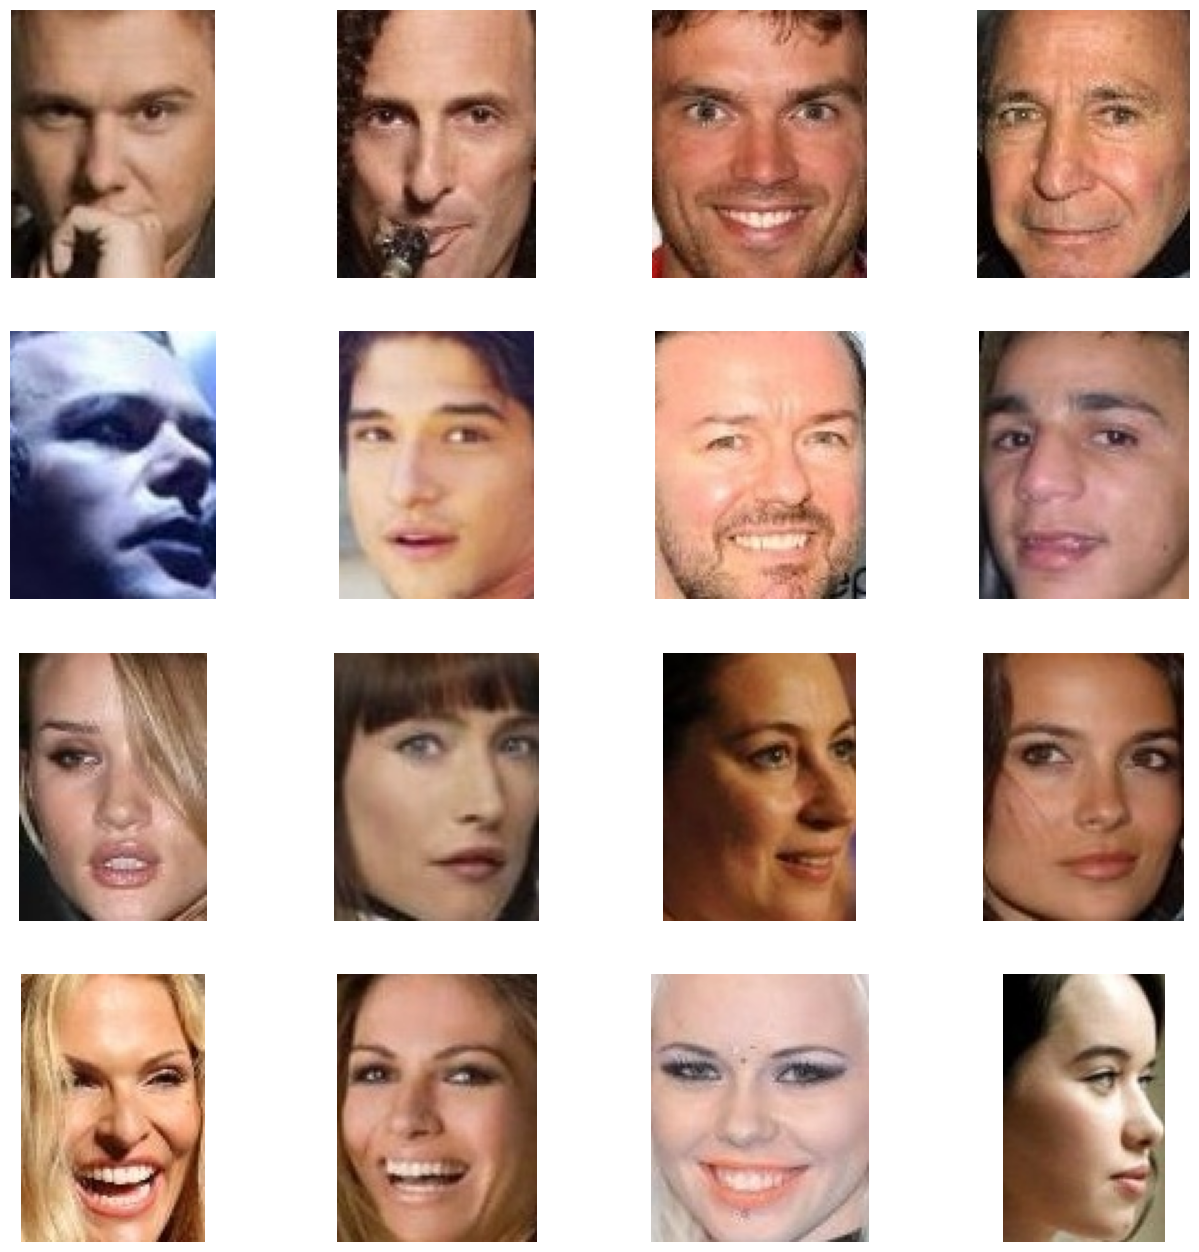

In [8]:

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_male_dir, fname) 
                for fname in train_male_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_female_dir, fname) 
                for fname in train_female_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
model = tf.keras.models.Sequential([
    
                                   tf.keras.layers.Conv2D(16,(3,3),activation = 'relu' , input_shape = (150,150,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                       
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
    
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
    
                                   tf.keras.layers.Flatten(),
    
               
                                   tf.keras.layers.Dense(units = 512 , activation = 'relu' ),
                                   tf.keras.layers.Dense(units = 1 , activation = 'sigmoid' ),
    

])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [11]:
from tensorflow.keras.optimizers import RMSprop


model.compile(
              optimizer = RMSprop(learning_rate = 0.001),
    
              loss  =  'binary_crossentropy',
    
               metrics = ['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen  = ImageDataGenerator(rescale = 1 /255)
validation_datagen  = ImageDataGenerator(rescale = 1 /255)


train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    batch_size = 20 ,
                                                    class_mode = 'binary',
                                                    target_size = (150,150) )

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                  batch_size = 20 ,
                                                  class_mode = 'binary',
                                                  target_size = (150,150)
                                
                                                 )





Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
class mycallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self,ephoch, logs = {}):
        
        if(logs.get('loss') < 0.2 and logs.get('accuracy')> 92):
            
            print("\n Congratelation  you get the accuracy that you want !")
            
            self.model.stop_training = True
           

callbacks = mycallback()          


In [16]:
history = model.fit(
            train_generator,
            epochs=10,
            validation_data=validation_generator,
            verbose=2,
            callbacks = [callbacks]
            )

Epoch 1/15
200/200 - 48s - loss: 0.3209 - accuracy: 0.8690 - val_loss: 0.2651 - val_accuracy: 0.9060 - 48s/epoch - 242ms/step
Epoch 2/15
200/200 - 49s - loss: 0.2505 - accuracy: 0.8988 - val_loss: 0.2302 - val_accuracy: 0.9090 - 49s/epoch - 243ms/step
Epoch 3/15
200/200 - 49s - loss: 0.1864 - accuracy: 0.9265 - val_loss: 0.2134 - val_accuracy: 0.9160 - 49s/epoch - 245ms/step
Epoch 4/15
200/200 - 49s - loss: 0.1493 - accuracy: 0.9450 - val_loss: 0.2066 - val_accuracy: 0.9270 - 49s/epoch - 246ms/step
Epoch 5/15
200/200 - 49s - loss: 0.1152 - accuracy: 0.9588 - val_loss: 0.2270 - val_accuracy: 0.9260 - 49s/epoch - 244ms/step
Epoch 6/15
200/200 - 49s - loss: 0.0868 - accuracy: 0.9688 - val_loss: 0.2020 - val_accuracy: 0.9290 - 49s/epoch - 247ms/step
Epoch 7/15
200/200 - 48s - loss: 0.0757 - accuracy: 0.9745 - val_loss: 0.2076 - val_accuracy: 0.9270 - 48s/epoch - 241ms/step
Epoch 8/15
200/200 - 50s - loss: 0.0538 - accuracy: 0.9818 - val_loss: 0.2263 - val_accuracy: 0.9380 - 50s/epoch - 248

1/1 [==============================] - 0s 295ms/step
[0.99995655]
this person it's male !


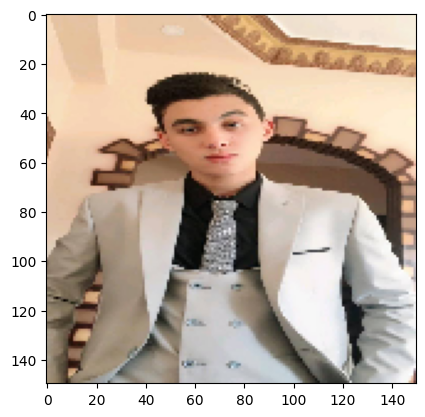

In [17]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array


path = r"C:\Users\yahya\OneDrive\Pictures\You\Before.jpg"


img = load_img(path, target_size=(150, 150))
plt.imshow(img)
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)

print(classes[0])
  
if classes[0] > 0.5:
     print("this person it's male !")
else:
     print( "this person it's female !")